In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

In [4]:
df.shape

(11251, 15)

In [14]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [10]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [11]:
df.dropna(inplace=True)

In [13]:
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

In [16]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [18]:
df.rename(columns = {'Marital_Status':'married'})

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,married,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206


In [19]:
df[['Age','Amount']].describe()

,Age,Amount
count,11239.000000,11239.000000
mean,35.410357,9453.610553
std,12.753866,5222.355168
min,12.000000,188.000000
25%,27.000000,5443.000000
50%,33.000000,8109.000000
75%,43.000000,12675.000000
max,92.000000,23952.000000


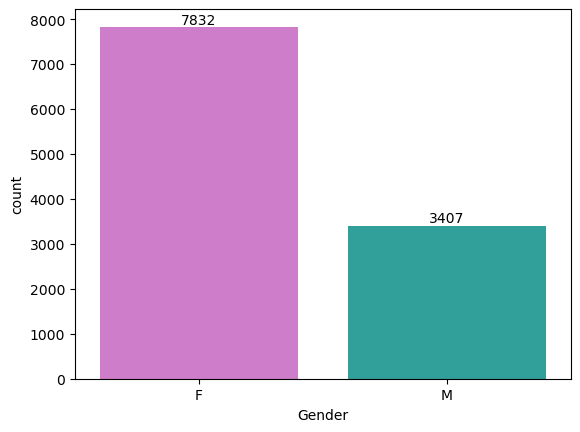

In [26]:
#gender
custom_palette = ["#DA70D6", "#20B2AA"]
ax = sns.countplot(x='Gender', data=df, palette=custom_palette)

#bar labels
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

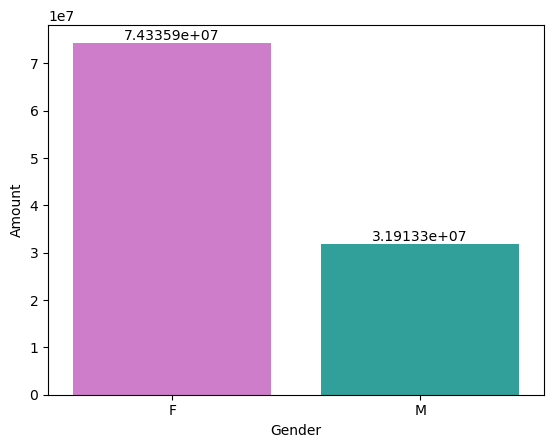

In [29]:
#gender vs total amount

sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
custom_palette = ["#DA70D6", "#20B2AA"]
ax=sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, palette=custom_palette)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

from the above graph most of the buyers are females and purchasing power of females is greater than men

In [31]:
#AGE

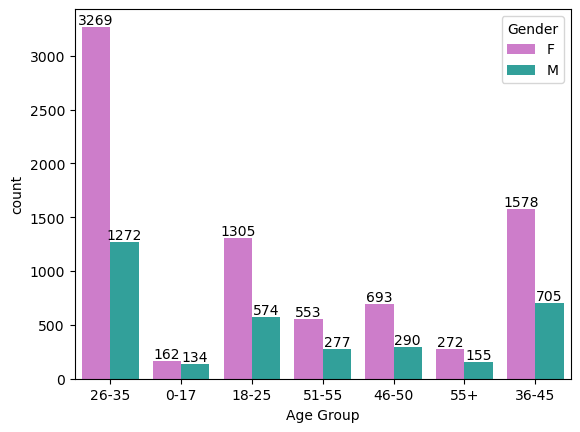

In [33]:
custom_palette = ["#DA70D6", "#20B2AA"]
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender',  palette=custom_palette)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

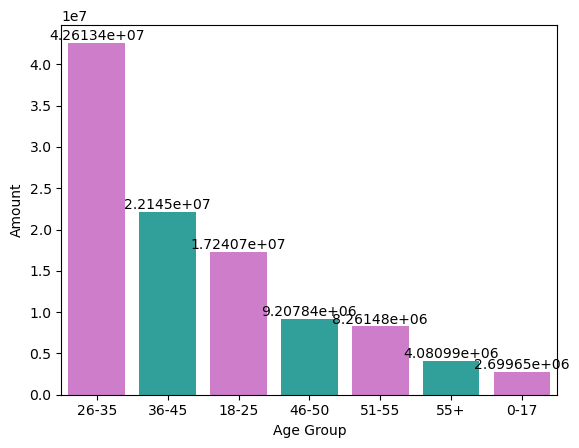

In [34]:
# Total Amount vs Age Group
custom_palette = ["#DA70D6", "#20B2AA"]
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

ax = sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette=custom_palette)
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

most of the buyers are from age group 26-35

<Axes: xlabel='State', ylabel='Orders'>

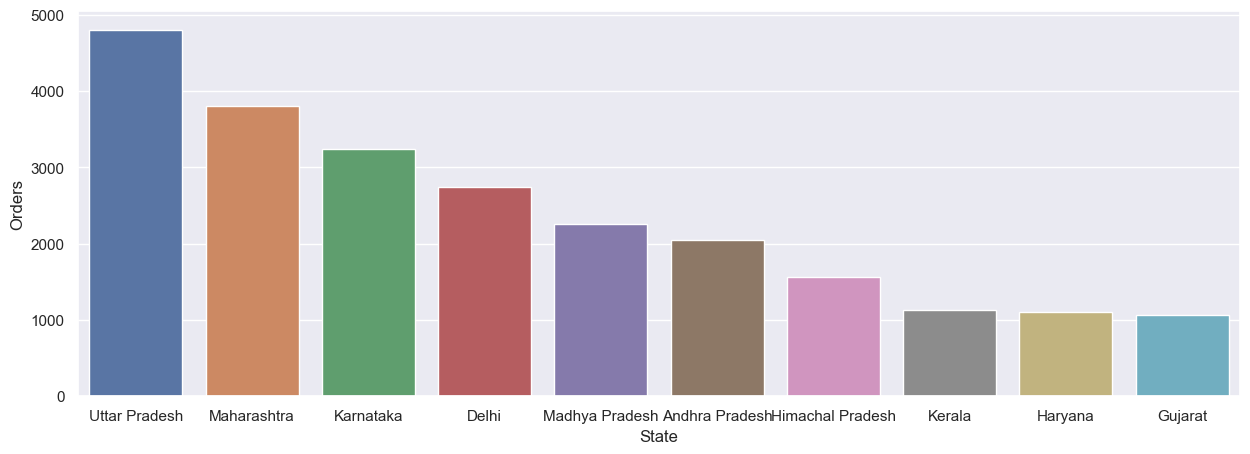

In [36]:
# total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

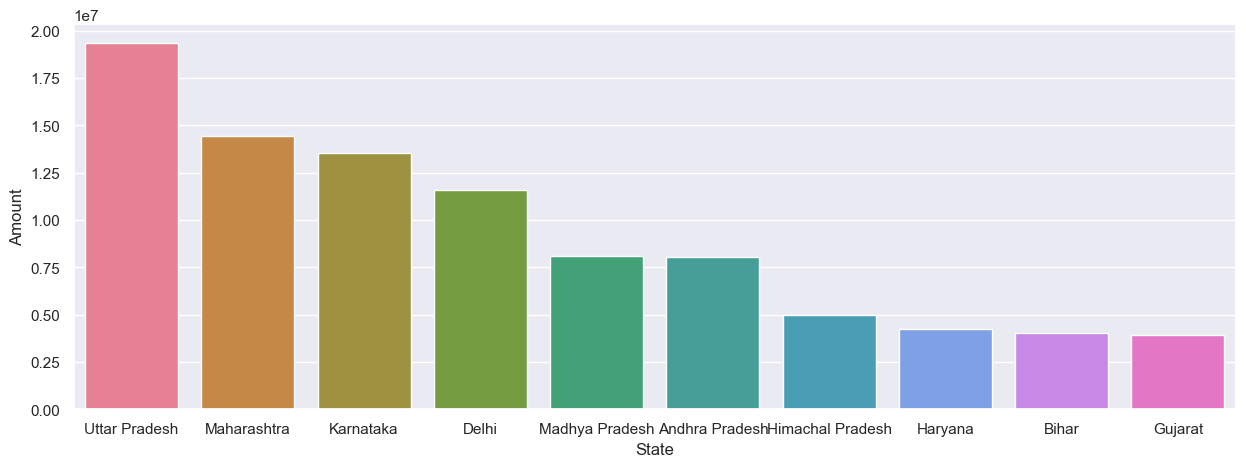

In [39]:
# total sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
custom_palette = sns.color_palette("husl", 10) 
ax = sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette=custom_palette)


plt.show()

most of the orders and total sales are from Uttar Pradesh, Maharashtra and Karnataka respectively

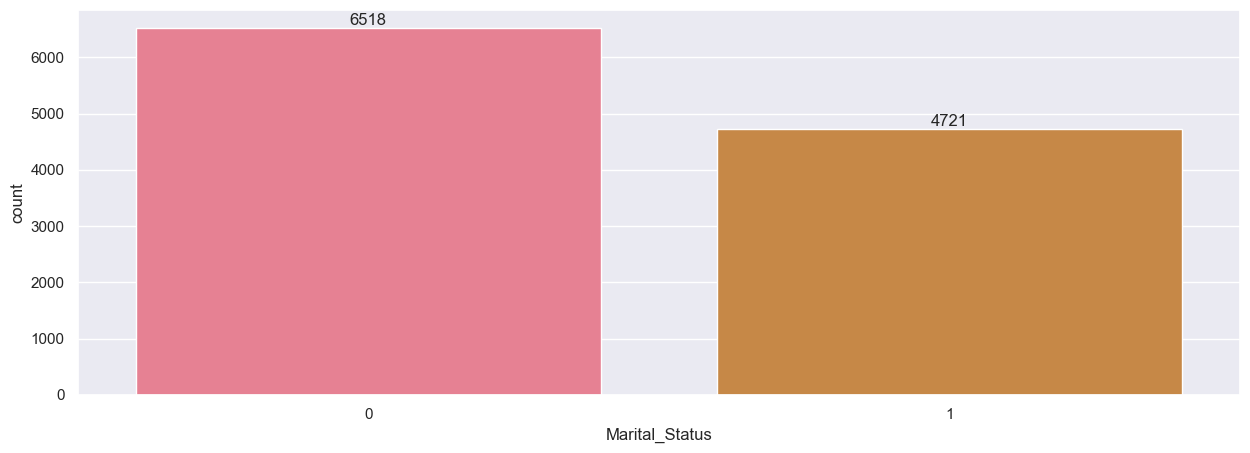

In [40]:
#marital status
ax = sns.countplot(data = df, x = 'Marital_Status', palette=custom_palette )
custom_palette = sns.color_palette("husl")
sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.show()

most of the buyers are married(women) and they have high purchasing power

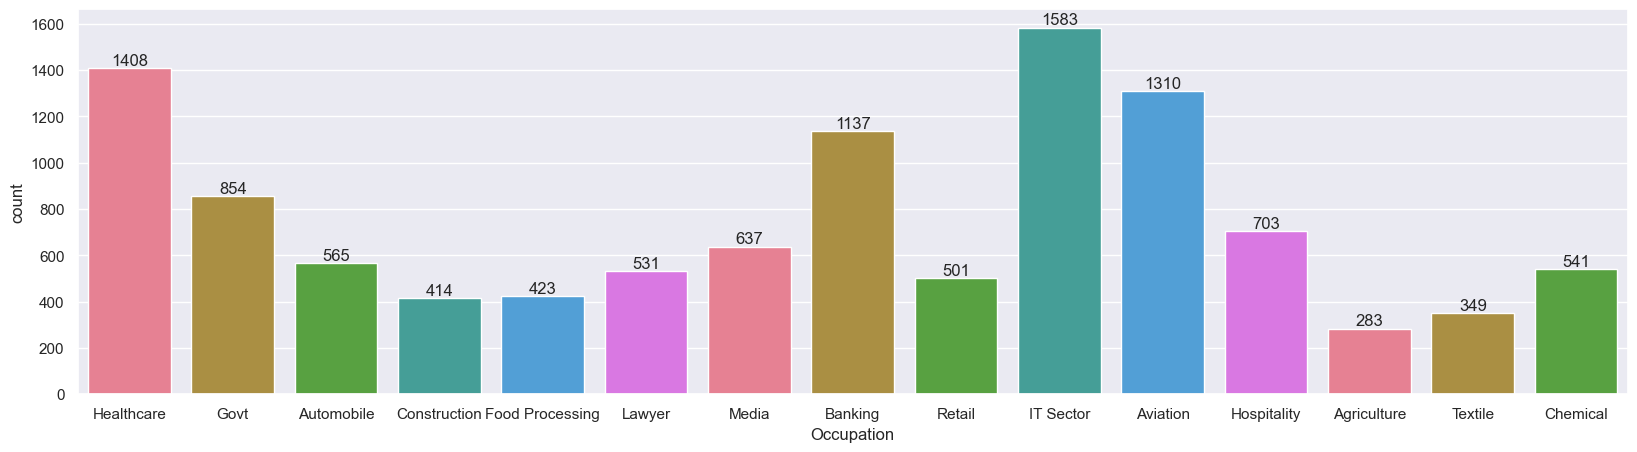

In [41]:
#occupation
custom_palette = sns.color_palette("husl")
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation', palette=custom_palette )

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.show()

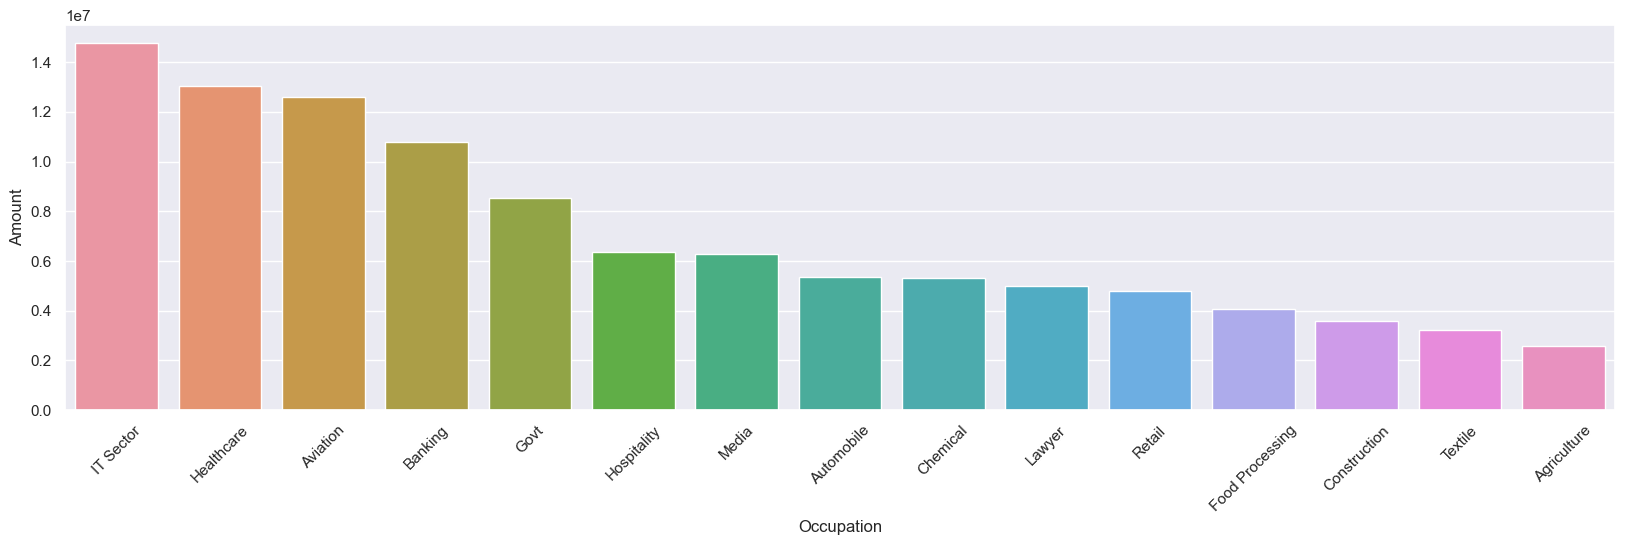

In [47]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')
plt.xticks(rotation=45)
plt.show()

most of the buyers are working in IT, Healthcare and Aviation sector

In [43]:
#product

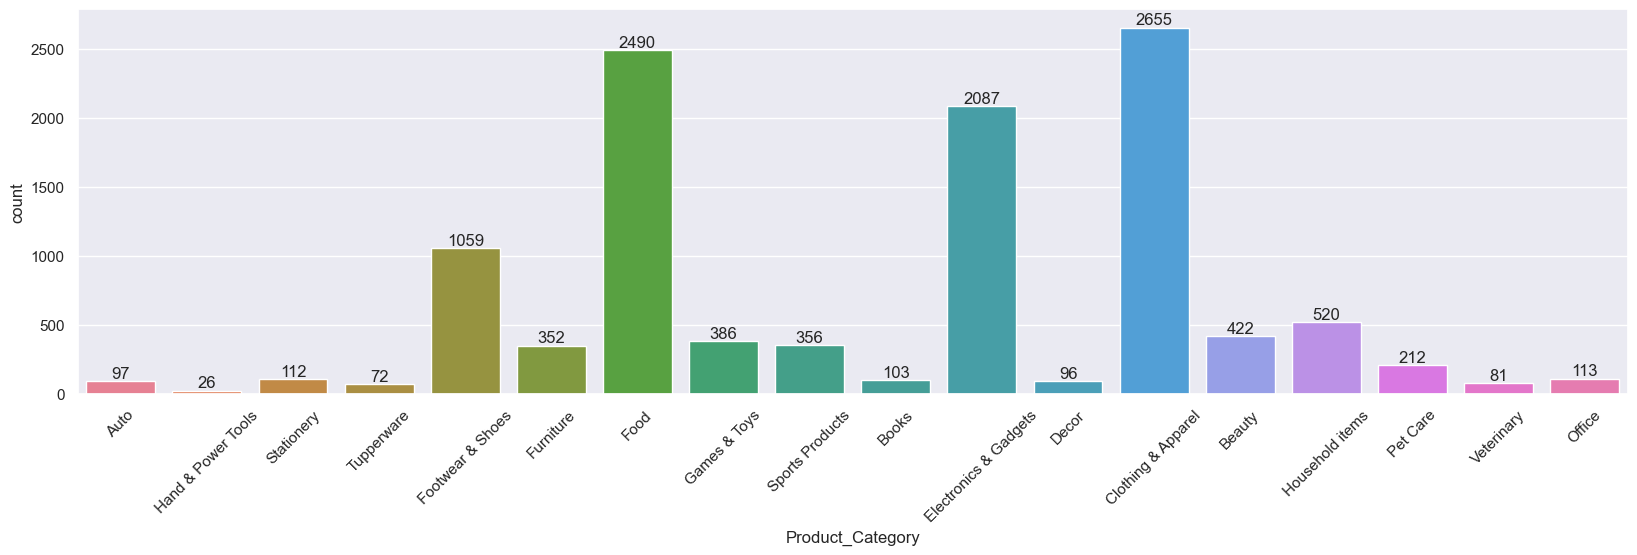

In [48]:
sns.set(rc={'figure.figsize':(20,5)})
num_categories = df['Product_Category'].nunique()
custom_palette = sns.color_palette("husl", num_categories)
ax = sns.countplot(data = df, x = 'Product_Category', palette=custom_palette)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xticks(rotation=45)  
plt.show()

<Axes: xlabel='Product_Category', ylabel='Amount'>

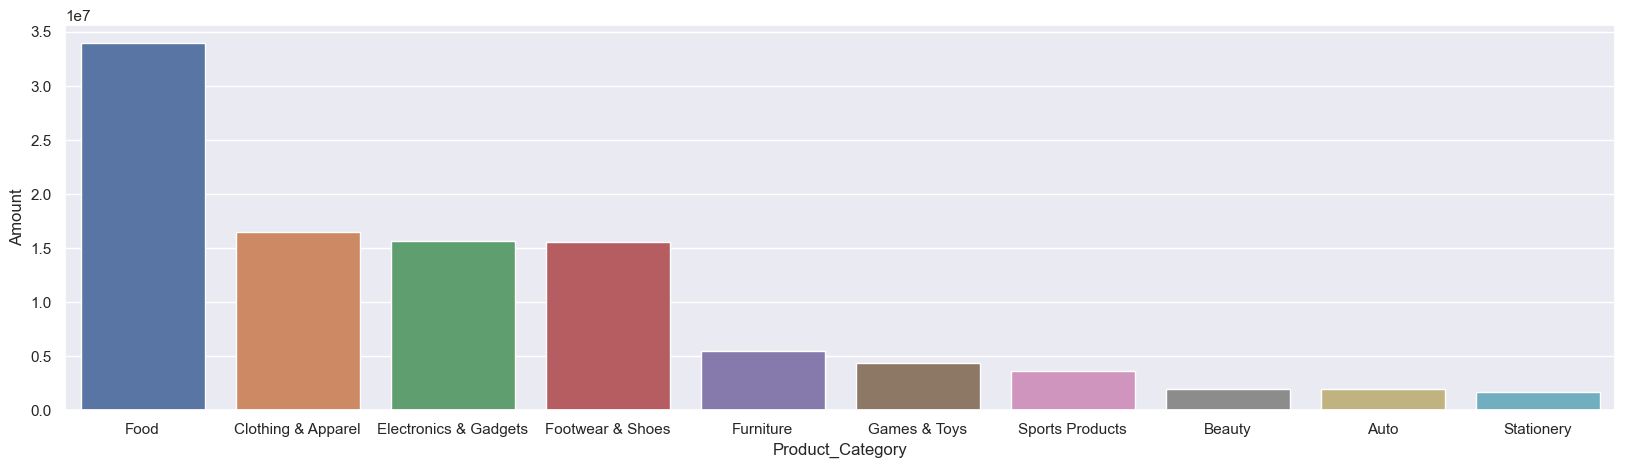

In [49]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

most of the sold products are from Food, Clothing and Electronics category

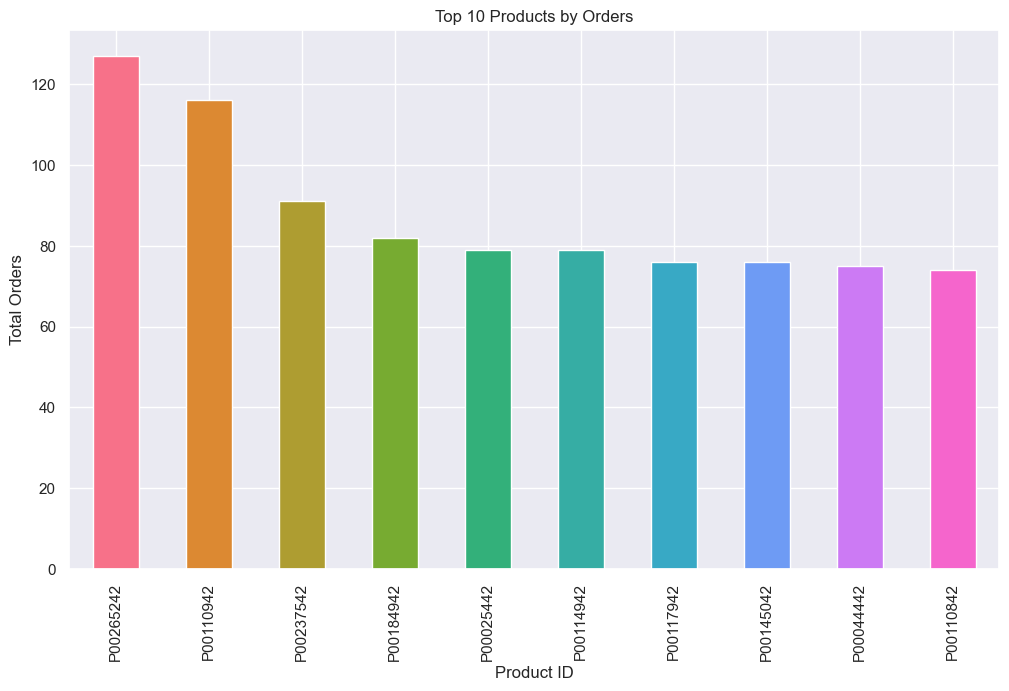

In [53]:
# top 10 most sold products 

top_products = df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False)


palette = sns.color_palette("husl", 10)  
custom_colors = palette.as_hex()  


fig1, ax1 = plt.subplots(figsize=(12,7))
top_products.plot(kind='bar', color=custom_colors)

ax1.set_xlabel('Product ID')
ax1.set_ylabel('Total Orders')
ax1.set_title('Top 10 Products by Orders')


plt.show()

CONCLUSION : 
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.